<a href="https://www.kaggle.com/code/yutodennou/model-time-series-prediction-tesla-stock?scriptVersionId=176425219" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 1. Purpose🎉 </b></div>

**Making future prediction model of Tesla Stock Value!!**

<div style="background-color:#f0fae9; padding:6px 20px; border-radius:15px;">
    <br>
    <div style="font-weight:bold;font-size:24px;">💡Direction</div>
    <ul style="font-size:18px;">
      <li>Preparing for Prophet</li>
      <li>Make models and visualize</li>
      <li>Modify the model and evaluate</li>
    </ul>
</div>

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 2. Preparing for Prophet🗃️ </b></div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/tesla-stock-insights-and-predictions/tesla_stock_data.csv')
df.head()

,Date,Year,Open,High,Low,Close,Volume,Adj Close
0,2020-01-02,2020,28.299999,28.713333,28.114000,28.684000,142981500,28.684000
1,2020-01-03,2020,29.366667,30.266666,29.128000,29.534000,266677500,29.534000
2,2020-01-06,2020,29.364668,30.104000,29.333332,30.102667,151995000,30.102667
3,2020-01-07,2020,30.760000,31.441999,30.224001,31.270666,268231500,31.270666
4,2020-01-08,2020,31.580000,33.232666,31.215334,32.809334,467164500,32.809334


In [3]:
!pip install prophet
from prophet import Prophet

### 💡We have to make the "ds" and "y" columns to fit with the Prophet instance

In [4]:
day = '2023-06-30'
train = df[df['Date']<=day]
test = df[df['Date']>day]

In [5]:
train['ds'] = train.Date.copy()
test['ds'] = test.Date.copy()
train['y'] = train['Adj Close'].copy() # Adjusted closing price
test['y'] = test['Adj Close'].copy()

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 3. Make models and visualize🔍 </b></div>

### Plot original stock values

**Check the tendency and sellect range of training data**

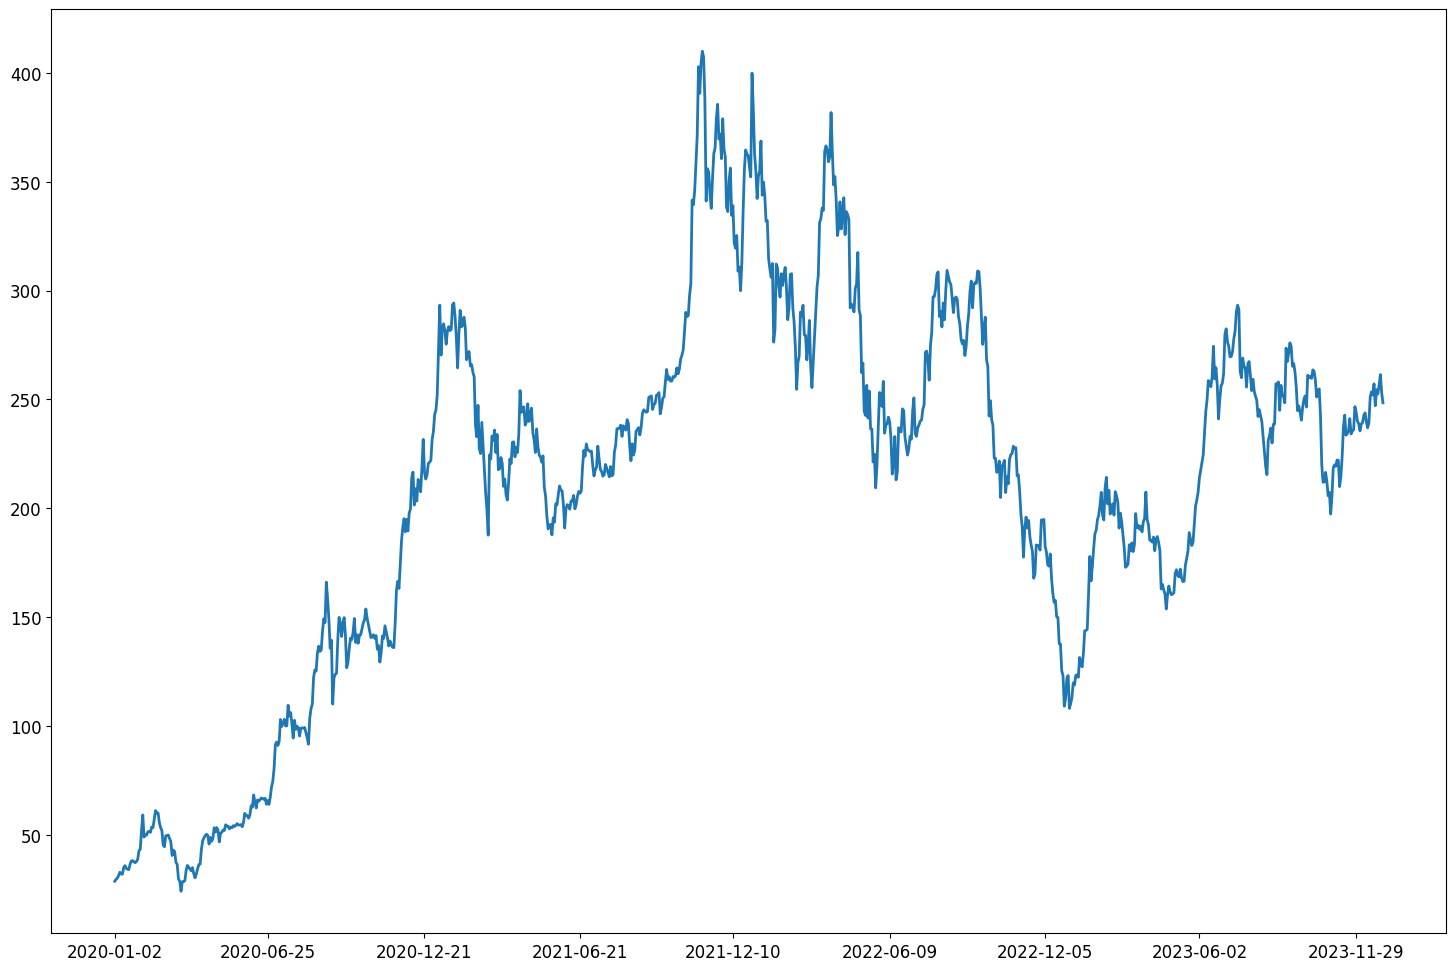

In [6]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
ax.plot_date(df['Date'], df['Adj Close'], '-', linewidth=2,label='Company 1')
locator = mdates.AutoDateLocator(minticks=3)
ax.xaxis.set_major_locator(locator)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

### Make A Model

**To predict for a half year from 2023.07.01~2023.12.31, put 183 into `make_future_dataframe` method**

10:32:37 - cmdstanpy - INFO - Chain [1] start processing
10:32:37 - cmdstanpy - INFO - Chain [1] done processing


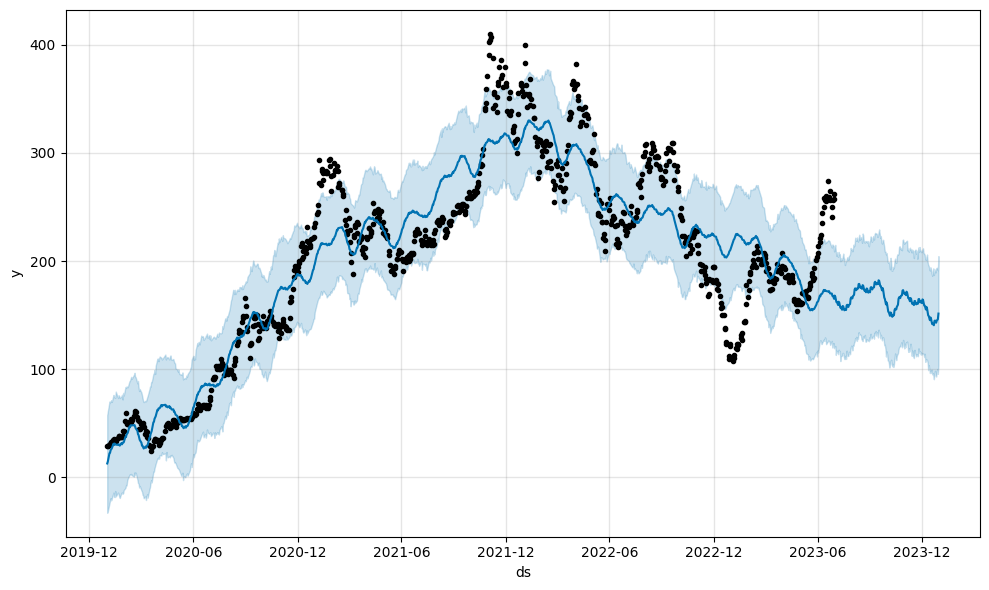

In [7]:
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(train)
future_df = model.make_future_dataframe(183)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

**To campare test data with predict data, merge them with the key of date `ds`, but datetime format can't be used for merging and make the column for it.**

In [8]:
test['ds_str'] = test['ds'].astype(str)
predicted = forecast_df[['ds', 'yhat']].tail(183)
predicted['ds_str'] = predicted['ds'].astype(str)

In [9]:
compare = pd.merge(test, predicted, on='ds_str', how='left')

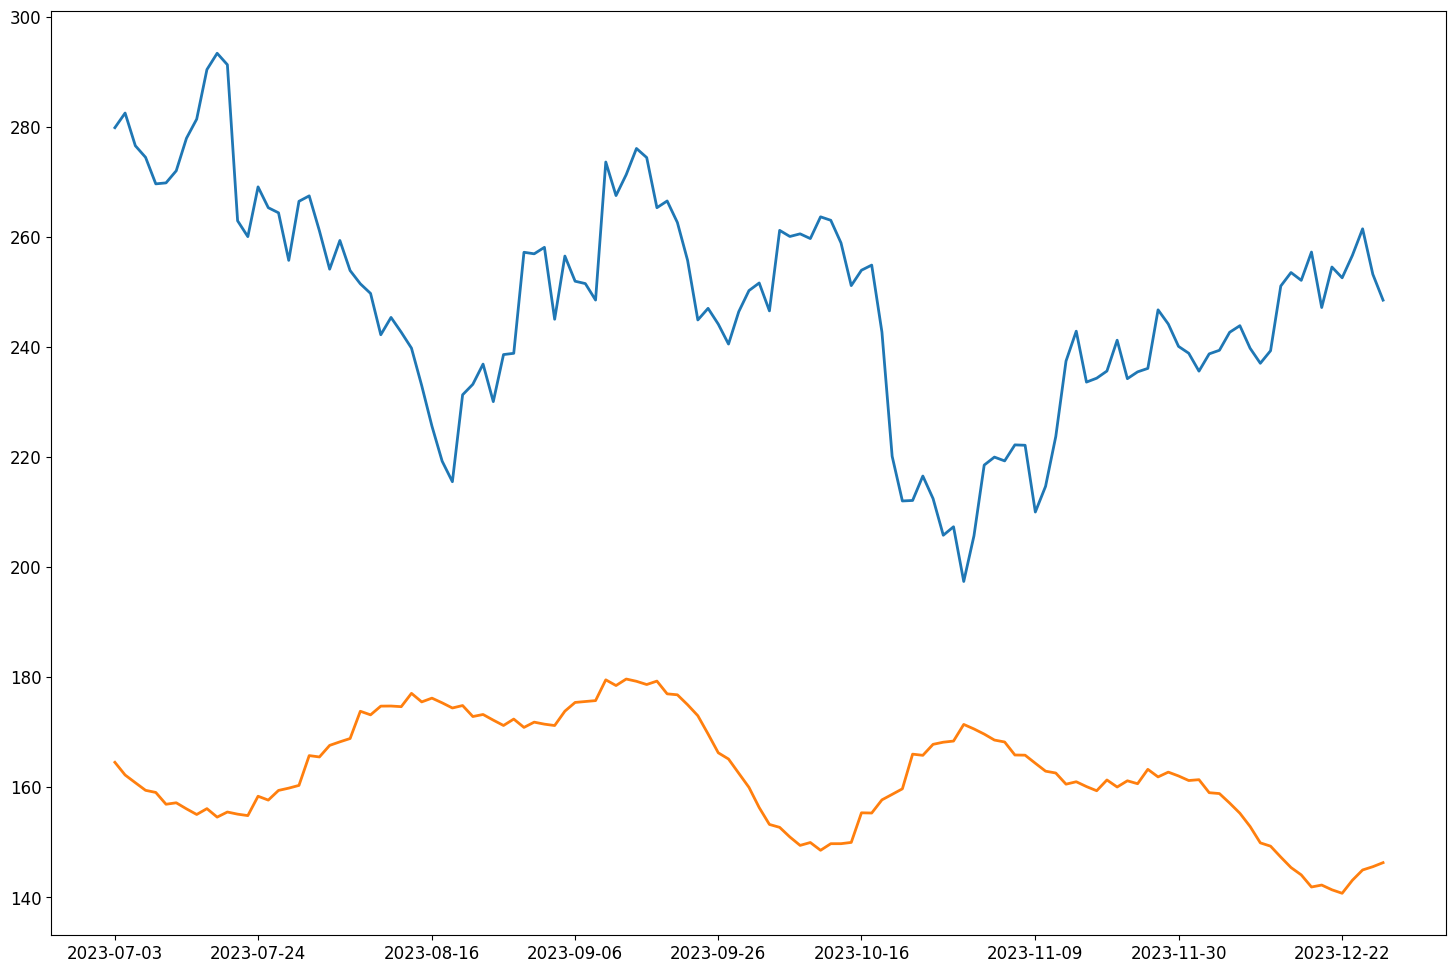

In [10]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
ax.plot(compare['Date'], compare['y'], '-', linewidth=2)
ax.plot(compare['Date'], compare['yhat'], '-', linewidth=2)

locator = mdates.AutoDateLocator(minticks=10)
ax.xaxis.set_major_locator(locator)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

**Looks big differences between actual data and prediction. Let's check MAE and trend components**

In [11]:
mae = mean_absolute_error(compare['y'], compare['yhat'])
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 84.97196264238725


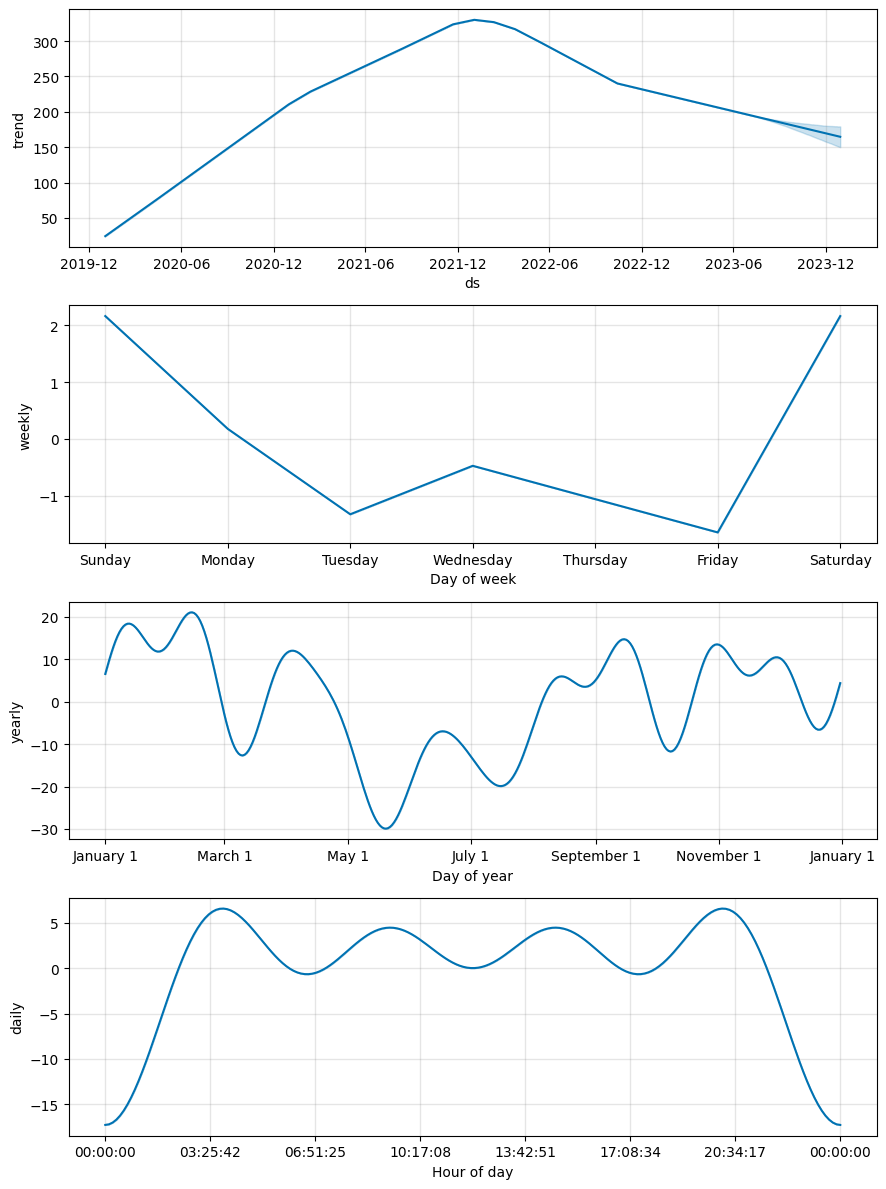

In [12]:
model.plot_components(forecast_df)
plt.show()

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34); background-color:rgb(255,255,255); "> <b> 4. Modify the model and evaluate👨‍🔧</b></div>




**Now nake new model by refining hyperparameters**

In [13]:
day = '2020-12-01'
train = train[train['Date']>day]

10:32:40 - cmdstanpy - INFO - Chain [1] start processing
10:32:41 - cmdstanpy - INFO - Chain [1] done processing


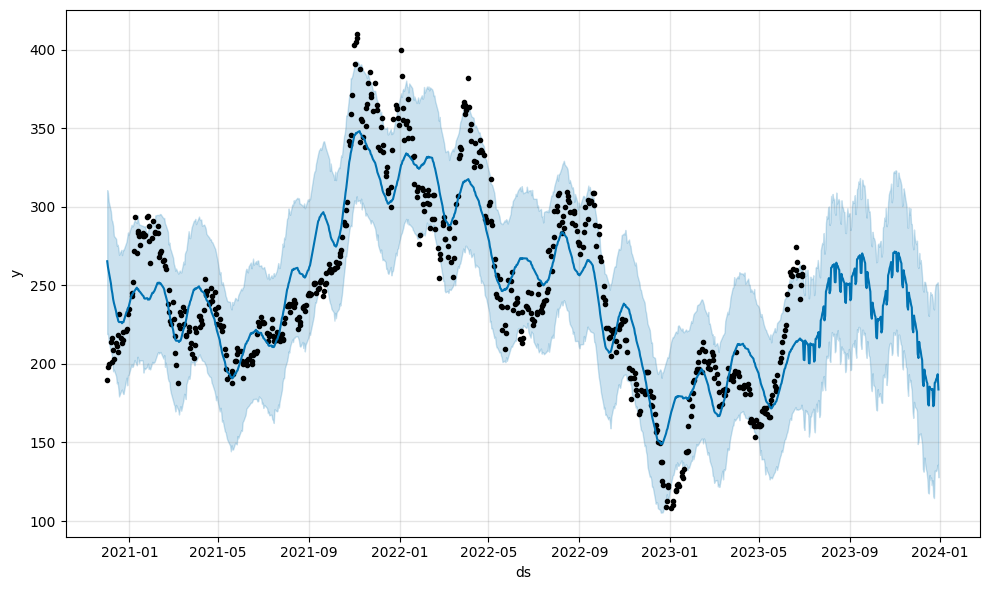

In [14]:
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    interval_width=0.90,
    changepoint_range=0.75, 
    n_changepoints=95
)
model.fit(train)
future_df = model.make_future_dataframe(183)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

In [15]:
predicted = forecast_df[['ds', 'yhat']].tail(183)
predicted['ds_str'] = predicted['ds'].astype(str)
compare = pd.merge(test, predicted, on='ds_str', how='left')

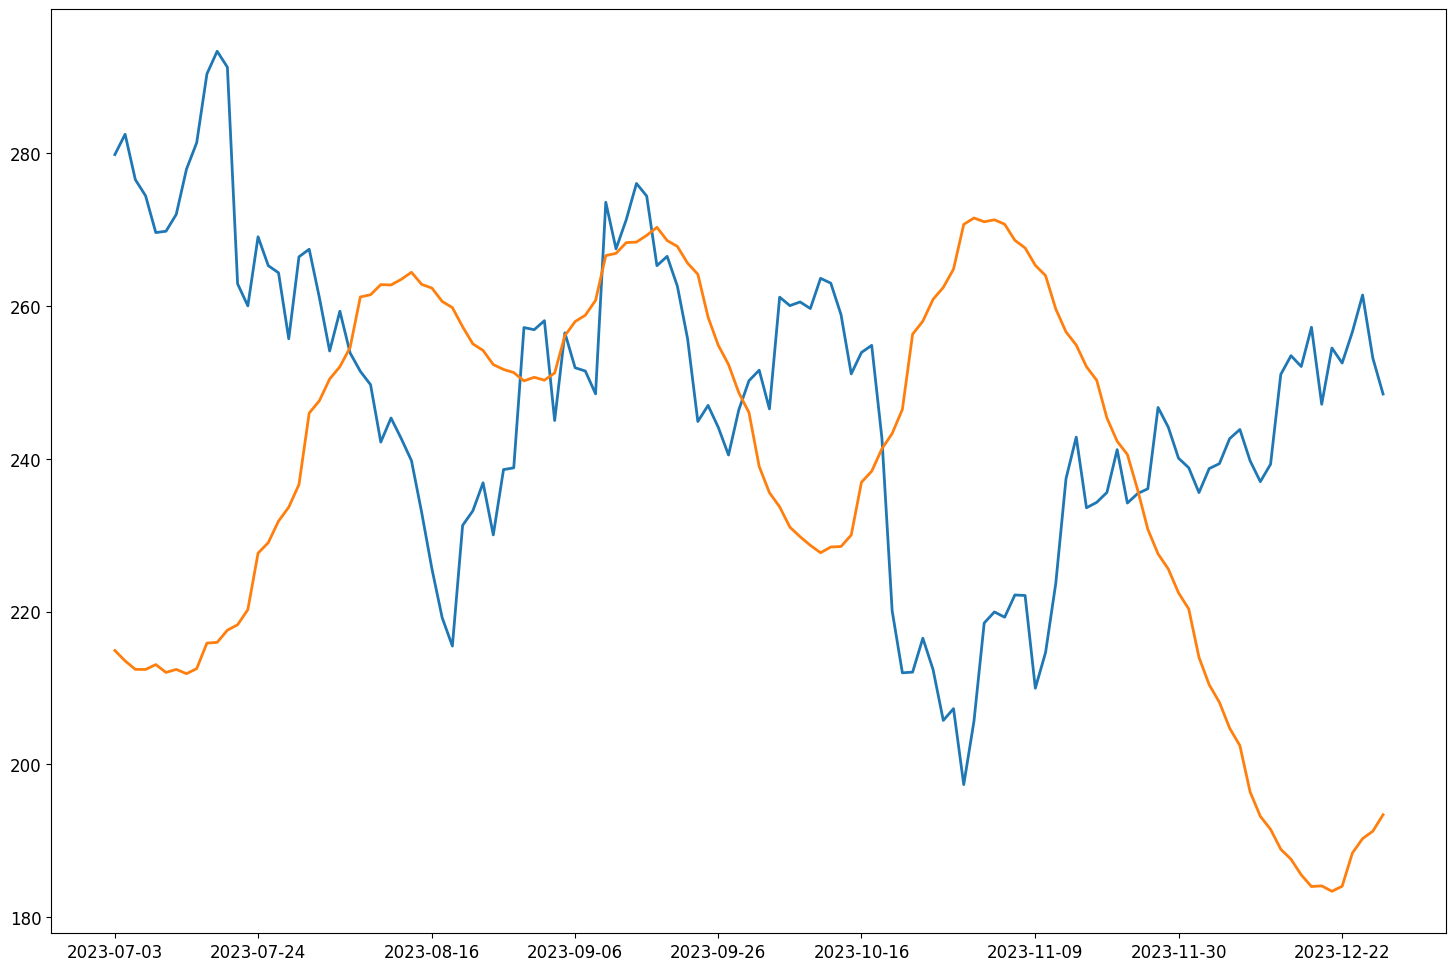

In [16]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
ax.plot(compare['Date'], compare['y'], '-', linewidth=2)
ax.plot(compare['Date'], compare['yhat'], '-', linewidth=2)

locator = mdates.AutoDateLocator(minticks=10)
ax.xaxis.set_major_locator(locator)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

In [17]:
mae = mean_absolute_error(compare['y'], compare['yhat'])
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 31.457443891119702


<div style="background-color:#fbf5e0; padding:6px 20px; border-radius:15px;">
    <br>
    <div style="font-weight:bold;font-size:24px;">💡MAE got less by refining hyperparameters</div>
    <ul style="font-size:18px;">
      <li>Range of train data</li>
      <li>Range of detection of trend change points</li>
      <li>Confidence interval</li>
    </ul>
</div>

**Thank you for reading!! Please follow my profiles!!**

[![Github](https://img.shields.io/badge/--FFFFFF?style=social&logo=github&label=Follow%20yutowac)](https://github.com/yutowac)


[![LinkedIn](https://img.shields.io/badge/--FFFFFF?style=social&logo=LinkedIn&label=Follow%20yutowac)](https://www.linkedin.com/in/wachi-yuto-b43ab3a2/)